In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline
from preamble import *

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print(
    f'Linear:'
    f'\ntrain score: {lr.score(X_train, y_train)}'
    f'\ntest score: {lr.score(X_test, y_test)}'
    f'\nintercept: {lr.intercept_}'
    # f'\ncoef/slop: {lr.coef_}'
)

lasso = Lasso().fit(X_train, y_train)
print(
    f'alpha=1:'
    f'\ntrain score: {lasso.score(X_train, y_train)}'
    f'\ntest score: {lasso.score(X_test, y_test)}'
    f'\nintercept: {lasso.intercept_}'
    f'\nNumber of features used: {np.sum(lasso.coef_ != 0)}'
)

lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print(
    f'alpha=0.01:'
    f'\ntrain score: {lasso001.score(X_train, y_train)}'
    f'\ntest score: {lasso001.score(X_test, y_test)}'
    f'\nintercept: {lasso001.intercept_}'
    f'\nNumber of features used: {np.sum(lasso001.coef_ != 0)}'
)

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(
    f'alpha=0.0001:'
    f'\ntrain score: {lasso00001.score(X_train, y_train)}'
    f'\ntest score: {lasso00001.score(X_test, y_test)}'
    f'\nintercept: {lasso00001.intercept_}'
    f'\nNumber of features used: {np.sum(lasso00001.coef_ != 0)}'
)



Linear:
train score: 0.9520519609032727
test score: 0.6074721959665823
intercept: 30.93456367364575
alpha=1:
train score: 0.29323768991114607
test score: 0.20937503255272272
intercept: 26.12453014498592
Number of features used: 4
alpha=0.01:
train score: 0.8962226511086496
test score: 0.7656571174549982
intercept: 20.476371685641084
Number of features used: 33
alpha=0.0001:
train score: 0.9507158754515461
test score: 0.643746742127324
intercept: 8.547103878625123
Number of features used: 96


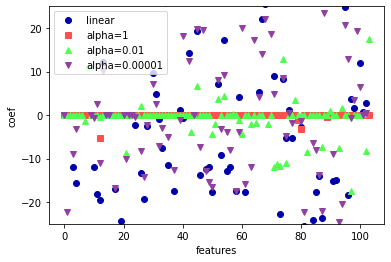

In [17]:
plt.plot(lr.coef_, 'o', label='linear')
plt.plot(lasso.coef_, 's', label='alpha=1')
plt.plot(lasso001.coef_, '^', label='alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='alpha=0.00001')

plt.xlabel('features')
plt.ylabel('coef')
plt.ylim(-25, 25)
plt.legend()